<a href="https://colab.research.google.com/github/caesarcc/pucminas-tcc-fake-news-detection/blob/main/passo01_coleta_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Coleta e unificação dos datasets Fake.br-Corpus e FakeWhatsApp.Br

In [ ]:
# Importação de bibliotecas utilizadas no pré-processamento
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
pd.set_option("display.max_rows", 50, 'display.max_colwidth', 0)

### Baixando dados do [Fake.br-Corpus](https://github.com/roneysco/Fake.br-Corpus)

In [ ]:
!git clone https://github.com/roneysco/Fake.br-Corpus

Cloning into 'Fake.br-Corpus'...
remote: Enumerating objects: 28763, done.
remote: Total 28763 (delta 0), reused 0 (delta 0), pack-reused 28763
Receiving objects: 100% (28763/28763), 37.10 MiB | 13.35 MiB/s, done.
Resolving deltas: 100% (14129/14129), done.
Checking out files: 100% (21602/21602), done.


### Carregando os dados

Vou utilizar a amostra "full_texts" do Corpus para realizar novo processamento e limpeza dos dados conforme as novas hipóteses propostas.

In [ ]:
DADOS_CAMINHO = "./Fake.br-Corpus/full_texts"

def load_txts(path):
    txts = []
    for filename in sorted(os.listdir(path), key=lambda x: int(re.match("[0-9]+", x).group())):
        with open(os.path.join(path, filename)) as f:
            txts.append(f.read())
    return [txt.rstrip() for txt in txts]

true_txts = load_txts(os.path.join(DADOS_CAMINHO, "true"))
fake_txts = load_txts(os.path.join(DADOS_CAMINHO, "fake"))

#confere se tem a mesma quantidade (dataset é balanceado)
assert(len(true_txts) == len(fake_txts))

dados_fakebr = pd.DataFrame(
    [{"texto": t, "classe": 0} for t in true_txts] \
         + [{"texto": f, "classe": 1}  for f in fake_txts]
)

In [ ]:
display(dados_fakebr[dados_fakebr['texto'].str.len()<400].sample(n=5)[['classe', 'texto']])

,classe,texto
5565,1,"Delcídio abre o jogo: ""Desde o mensalão, o PMDB é o principal aliado do PT. Vem muita bomba por aí"". Em entrevista para o jornalista Claudio Tognolli (da Jovem Pan), o ex-senador Delcídio do Amaral afirmou que as investigações contra o ex-presidente Lula já estão muito avançadas. ""A defesa de Lula continua usando aquela estratégia da vitimização"" disse o ex-senador. confira:"
5458,1,"Lima Duarte: ""Lula é um imbecil e Dilma nunca esteve preparada para nos governar"". "" Ela não está preparada para nos conduzir para um futuro melhor. Ela não sabe o que é isso. Que ela seja feliz em outro canto"". O ator Lima Duarte, juntamente com o jovem Tomé (do movimento Nas Ruas), gravou um vídeo onde ele dá sua opinião sobre a situação pela qual o país está passando. Lima destacou:"
5604,1,"Pequenina, fofa e brava! Bebê de 5 meses tem ataque de ciúmes quando seus pais se beijam. Uma linda bebê de apenas 5 meses está encantando a internet. Quando ela vê seus pais se beijando, ela dispara um ataque de choro! A pequenina fica feliz novamente quando as atenções se voltam para ela! Não é uma fofura?"
7113,1,Mais uma trapalhada? Dilma diz que governo cumpriu com as fiscalizações na barragem da Samarco. .
4440,1,"General diz que Constituição foi ""abandidada"": ""Os militares saberão resolver nosso grave problema"". . Em uma publicação feita ontem, Chagas destacou que a Constituição Brasileira foi ""abandidada"" ""A atual CF, promulgada após o fim do Regime Militar, transformou a liberdade em libertinagem e instrumentalizou a impunidade"""


### Baixando dados do [FakeWhatsApp.br](https://github.com/cabrau/FakeWhatsApp.Br)

In [ ]:
!git clone https://github.com/cabrau/FakeWhatsApp.Br

Cloning into 'FakeWhatsApp.Br'...
remote: Enumerating objects: 1053, done.
remote: Counting objects: 100% (189/189), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 1053 (delta 83), reused 189 (delta 83), pack-reused 864
Receiving objects: 100% (1053/1053), 413.70 MiB | 12.07 MiB/s, done.
Resolving deltas: 100% (329/329), done.
Checking out files: 100% (235/235), done.


In [ ]:
DADOS_CAMINHO = "/content/FakeWhatsApp.Br/data/2018/fakeWhatsApp.BR_2018.csv"
fakewhats_df = pd.read_csv(DADOS_CAMINHO, sep = ',', usecols=['text', 'misinformation','viral'])
fakewhats_df.rename(columns={'text': 'texto', 'misinformation': 'classe'}, inplace=True)

In [ ]:
pd.DataFrame(fakewhats_df[['classe','viral']].melt(
    var_name='campo', value_name='valor').value_counts()).rename(
        columns={0: 'contagem'}).sort_values(by=['campo', 'contagem'])

contagem
campo  valor          
classe  0     9877    
        1     11412   
       -1     261312  
viral   1     20872   
        0     261729

In [ ]:
# Remove registros não forma anotados no dataset
dados_fakewhats = fakewhats_df[fakewhats_df['classe'] > -1].copy()
# Remove registros que são virais (estão repetidos no dataset ou são similares)
dados_fakewhats = dados_fakewhats[dados_fakewhats['viral'] == 0].copy()
# Remove coluna de viral
dados_fakewhats.drop('viral', inplace=True, axis=1)

In [ ]:
display(dados_fakewhats[dados_fakewhats['texto'].str.len()<400].sample(n=5)[['classe', 'texto']])

,classe,texto
85635,0,"Alguém sabe me dizer se o feriado de sexta feira ainda tá de pé, já que o documento que D. Pedro I assinou decretando a independência foi queimado?"
167416,0,"*_Vamos começar uma campanha, quem é brasileiro e quer o bem do país, troque nesta semana sua foto do WhatsApp pela bandeira do Brasil, será a melhor pesquisa eleitoral que vc vai ver, espalhe essa ideia... Segunda voltamos ao normal, quem topa?_*"
19452,0,"VEJAM O QUE ACONTECEU NO DF \n\nColocamos hoje uma faixa no centro de Brasília, na rodoviária do Plano Piloto,\n\nEscrito: Bolsonaro Presidente Buzine \n\nOlhe o que aconteceu ..."
60017,0,"Eu vou votar meio a meio, \nUm pouco do Pt e um pouco no Bolsonaro\nAssim ninguém fica enchendo o saco.\nVou digitar o 1 do Haddad e depois o 7 do bolsonaro...ai confirmo! \nPronto, acabaram as brigas. 🇧🇷"
154322,0,"Eu voto em quem o Lula indicar, mostra o número aí Lula"


### Concatena os dadasets, confere e salva em arquivo

In [ ]:
dados_unidos = pd.concat(
    [dados_fakebr, dados_fakewhats],
    ignore_index=True,
    copy=True,
)
display(dados_fakebr.shape, dados_fakewhats.shape, dados_unidos.shape)

(7200, 2)

(2338, 2)

(9538, 2)

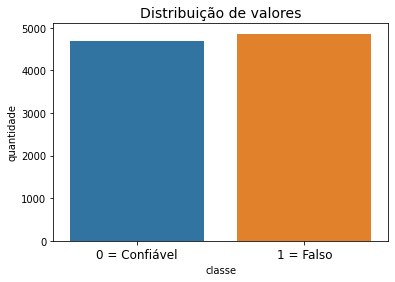

In [ ]:
ax = sns.countplot(x="classe", data=dados_unidos)
ax.set_xticklabels(["0 = Confiável", "1 = Falso"], fontsize=12)
ax.set_title('Distribuição de valores', fontsize=14)
ax.set_ylabel('quantidade')
plt.show()

In [ ]:
# Configura acesso ao Google Driver onde serão salvos os arquivos grandes
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Salva dados para uso no notebook do próximo passo.
os.makedirs("/content/drive/MyDrive/PUC/TCC/dados/", exist_ok=True)
dados_unidos.to_csv('/content/drive/MyDrive/PUC/TCC/dados/datasets_unificados.csv', sep = ',')